In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


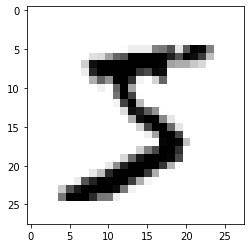

5


In [4]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.gray_r)
plt.show()
print (Y_train[0])

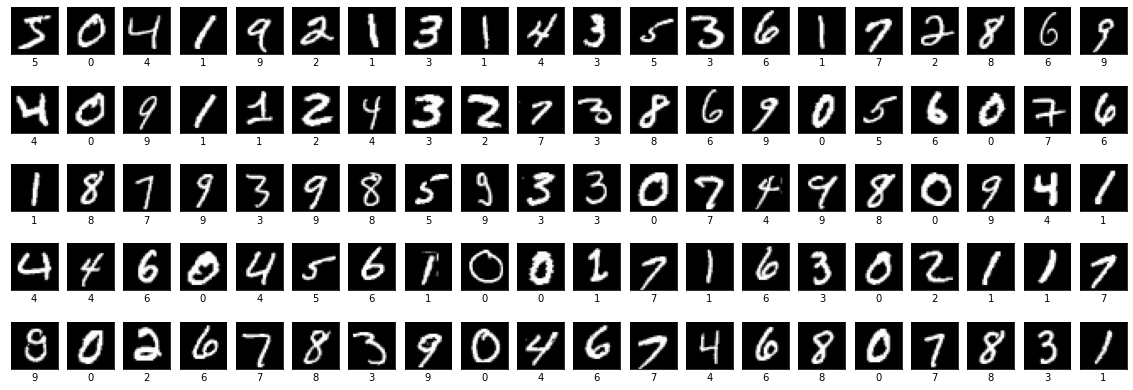

In [5]:
i=0
plt.figure(figsize=(20, 7))
for i in range (100):
    
    plt.subplot(5,20, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel (Y_train[i])
plt.show()

In [6]:
X_train, X_test = X_train.astype('float32')/255, X_test.astype ('float32')/255
X_train = X_train.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1)

In [7]:
model = tf.keras.Sequential ([
     tf.keras.Input(shape=(28,28,1)),
    
     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
     tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=128, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
h=model.fit(x=X_train, y=Y_train, epochs=10, validation_split= 0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 20s 8ms/step - loss: 0.1426 - accuracy: 0.9549 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0524 - val_accuracy: 0.9865
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0350 - val_ac

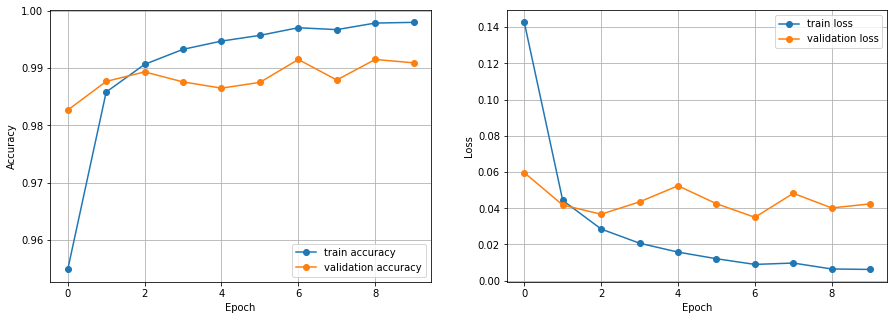

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss,test_acc = model.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0331 - accuracy: 0.9918

Test Accuracy: 0.9918000102043152

Test Loss: 0.03313888609409332


In [12]:
predictions = model.predict(X_test)

In [13]:
predictions[0]

array([6.0561539e-15, 2.4228904e-13, 3.3663038e-12, 2.0370697e-10,
       2.0155802e-18, 1.2866682e-15, 2.0657222e-21, 1.0000000e+00,
       1.0431399e-17, 8.2930442e-12], dtype=float32)

In [14]:
np.argmax(predictions[0])

7

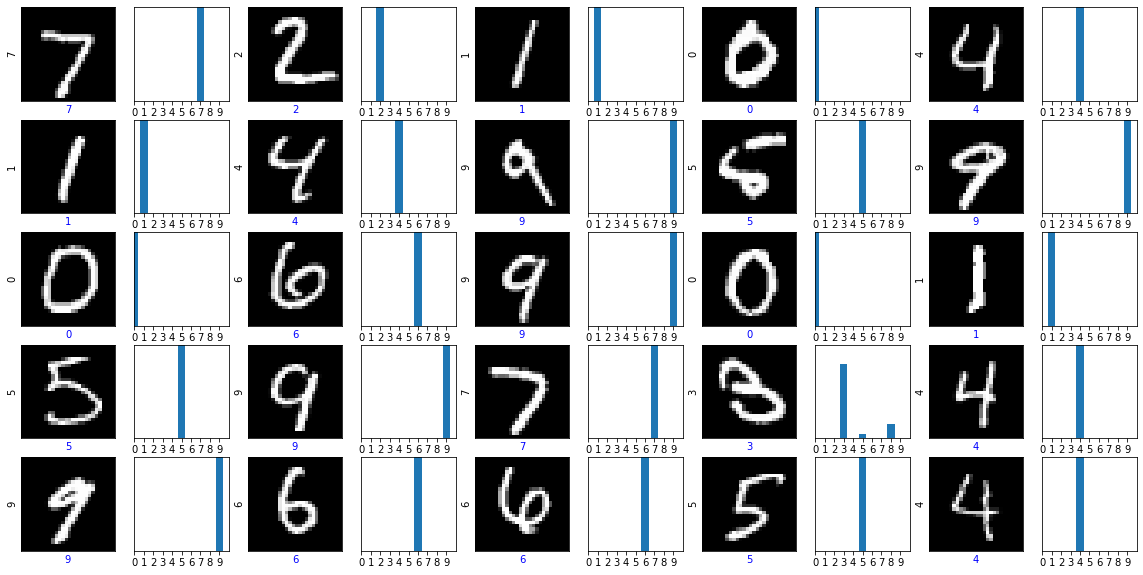

In [15]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i], cmap=plt.cm.gray )
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(Y_test[i])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='b')
    else:
        plt.xlabel(np.argmax(predictions[i]), color='g')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [16]:
model_2 = tf.keras.Sequential ([
     tf.keras.Input(shape=(28,28,1)),
    
     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
     tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=128, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [18]:
h_2=model_2.fit(x=X_train, y=Y_train, epochs=10, validation_split= 0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4964 - accuracy: 0.8644 - val_loss: 0.1579 - val_accuracy: 0.9527
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1389 - accuracy: 0.9576 - val_loss: 0.1069 - val_accuracy: 0.9674
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0985 - accuracy: 0.9700 - val_loss: 0.0858 - val_accuracy: 0.9735
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0792 - accuracy: 0.9755 - val_loss: 0.0808 - val_accuracy: 0.9767
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0885 - val_ac

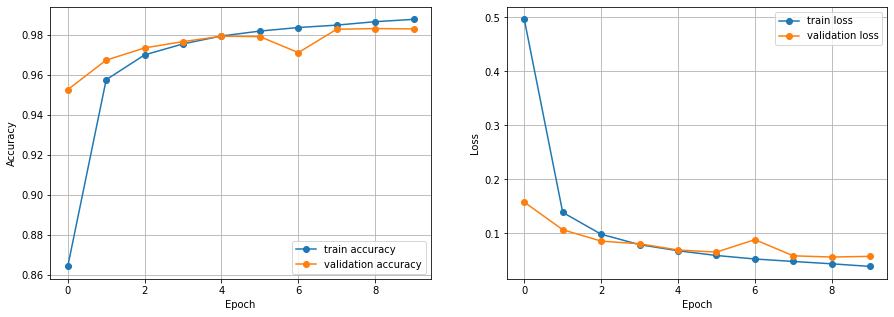

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_2.history['loss'], 'o-', label='train loss')
plt.plot(h_2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss,test_acc = model_2.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0488 - accuracy: 0.9831

Test Accuracy: 0.9830999970436096

Test Loss: 0.048768118023872375


In [21]:
predictions = model_2.predict(X_test)

In [22]:
predictions[0]

array([5.17886107e-08, 2.03351225e-09, 4.18861164e-05, 1.16087314e-04,
       4.13310185e-11, 1.88361724e-07, 6.94639441e-13, 9.99836683e-01,
       1.03835404e-07, 4.88531032e-06], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

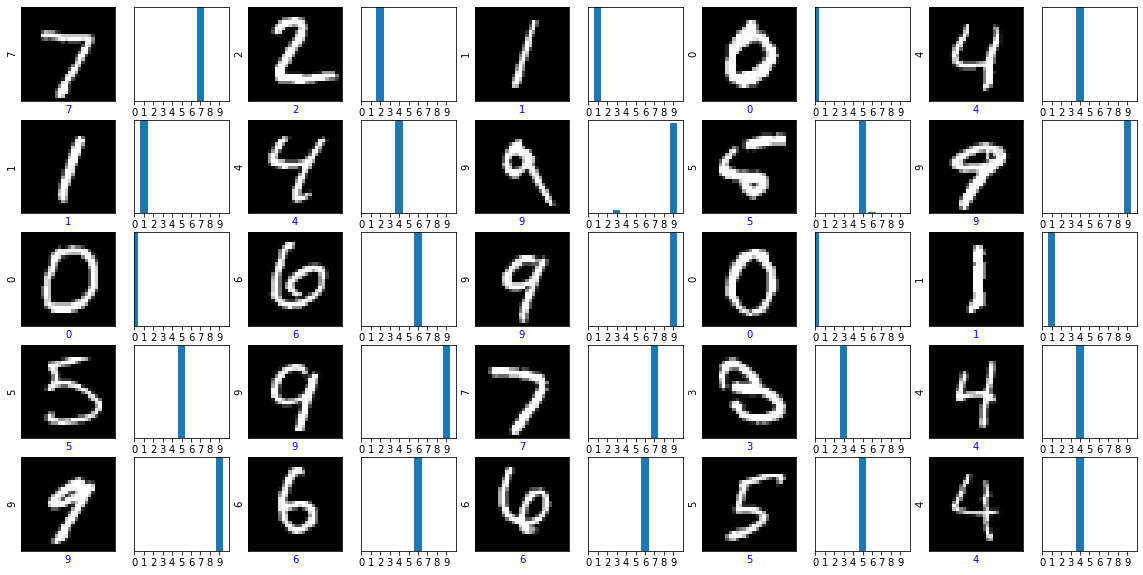

In [24]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i], cmap=plt.cm.gray )
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(Y_test[i])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='b')
    else:
        plt.xlabel(np.argmax(predictions[i]), color='g')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [25]:
model_3 = tf.keras.Sequential ([
     tf.keras.Input(shape=(28,28,1)),
    
     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
     tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=128, activation='relu'),
     tf.keras.layers.Dense(units=10, activation='softmax')
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [26]:
model_3.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [27]:
h_3=model_3.fit(x=X_train, y=Y_train, epochs=10, validation_split= 0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1368 - accuracy: 0.9579 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0424 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0367 - val_accuracy: 0.9903
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0416 - val_accuracy: 0.9902
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0492 - val_accuracy: 0.9881
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0453 -

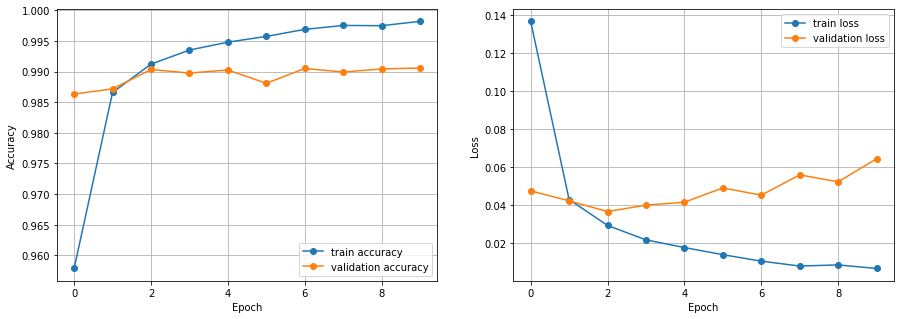

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_3.history['loss'], 'o-', label='train loss')
plt.plot(h_3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss,test_acc = model_3.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0592 - accuracy: 0.9914

Test Accuracy: 0.9914000034332275

Test Loss: 0.05916814133524895


In [30]:
predictions = model_3.predict(X_test)

In [31]:
predictions[0]

array([1.8821217e-24, 3.4923736e-19, 6.2260933e-18, 4.6210869e-19,
       8.0479195e-25, 2.5583260e-24, 2.1910779e-37, 1.0000000e+00,
       1.4499940e-22, 1.4994551e-15], dtype=float32)

In [32]:
np.argmax(predictions[0])

7

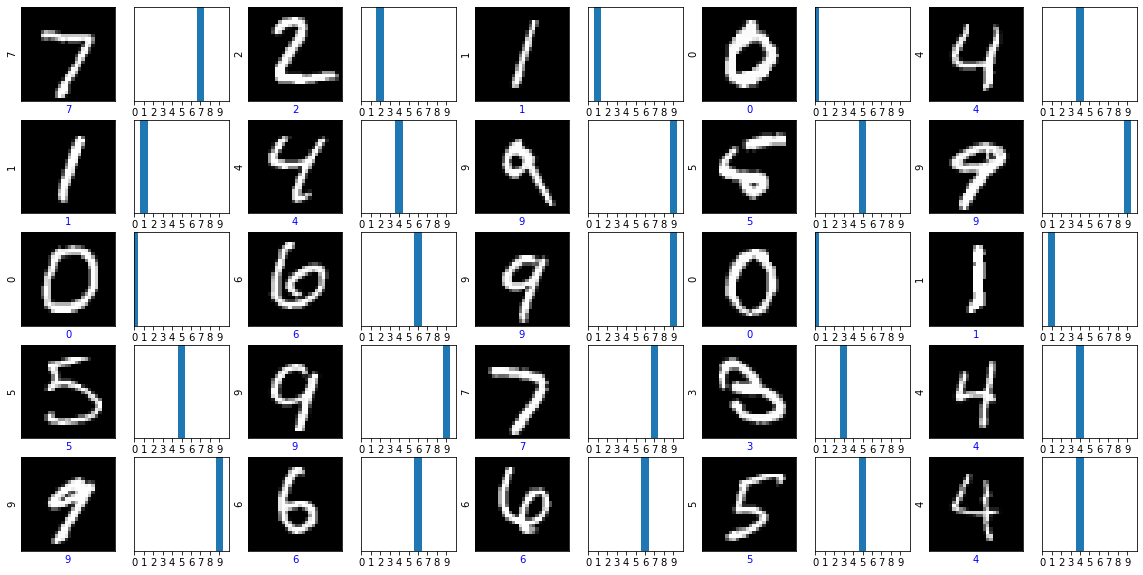

In [33]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i], cmap=plt.cm.gray )
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(Y_test[i])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='b')
    else:
        plt.xlabel(np.argmax(predictions[i]), color='g')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()